In [110]:
# PIL (Python Imaging Library) adds many image processing features to Python.
# Pillow is a fork of PIL that adds some user-friendly features.

# pip install pillow
# pip install image
# pip install wikipedia
# conda install pillow=4.0.0 for python 3.6
# conda install -c https://conda.anaconda.org/conda-forge wordcloud

import sys
from os import path
import numpy as np
from PIL import Image
import wikipedia
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline

In [77]:
# get path to script's working directory

import os
currdir = os.getcwd()

In [78]:
def get_wiki(query):
    # get best matching title (i.e the first occurrence) for a given query
    title = wikipedia.search(query)[0]

    # get wikipedia page for the selected title
    page = wikipedia.page(title)
    return page.content # return the contents of the page

In [115]:
def create_wordcloud(text):
    # create numpy array for the wordcloud mask image by importing it from the directory
    # using the Image library
    #mask = np.array(Image.open(path.join(currdir, "mask-cloud.png")))

    # create set of stopwords
    stopwords = set(STOPWORDS)

    # create wordcloud object
    wc = WordCloud(background_color="white",
                   width = 800, height = 800,
                   min_font_size = 10,
                   max_words=150, 
                   #mask=mask,
                   stopwords=stopwords)
    
    # generate wordcloud
    wc.generate(text) # Generate wordcloud from text

    # save wordcloud
    wc.to_file(path.join(currdir, "wc.png"))
    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wc) # Display an image on the axes
    plt.axis("off") # Turn off axes values
    plt.tight_layout(pad = 0.1)
    # It can happen that your axis labels or titles go outside the figure area, and are thus clipped.
    # This can be taken care of by the tight layout
    # pad: These control the extra padding around the figure border and between subplots. 
    plt.show()

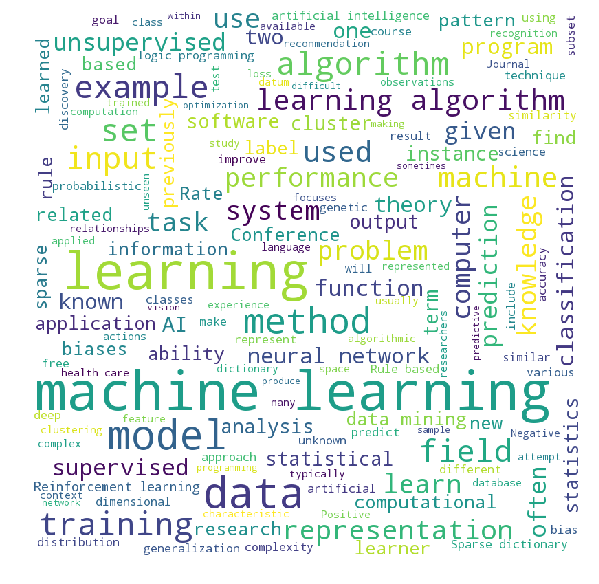

In [116]:
if __name__ == "__main__":
    
    # generate wordcloud
    create_wordcloud(get_wiki("Machine Learning"))